In [9]:
import pandas as pd
import numpy as np
import graph_tool.all as gt
import matplotlib.pyplot as plt

In [3]:
organes = (pd.read_csv('out/organes.csv'))
votes = pd.read_csv('out/votes.csv')

In [4]:
acteurs_votes = (
    votes
    .pivot_table(
        index='acteurRef',
        columns='scrutin',
        values='position',
        aggfunc='first'
    )
    .fillna('non votant')
)

acteurs_votes

scrutin,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,pour,pour,non votant,pour,pour,pour,pour,pour,non votant,non votant,...,pour,pour,pour,pour,pour,pour,pour,pour,pour,pour
PA1206,pour,pour,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,...,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant
PA1327,non votant,contre,non votant,non votant,non votant,non votant,non votant,contre,contre,contre,...,non votant,contre,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant
PA1567,pour,non votant,non votant,non votant,non votant,non votant,pour,non votant,non votant,non votant,...,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant
PA1592,non votant,non votant,non votant,non votant,non votant,non votant,non votant,contre,non votant,non votant,...,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant,non votant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,non votant,non votant,non votant,contre,contre,contre,contre,contre,contre,contre,...,contre,contre,contre,contre,contre,contre,contre,contre,contre,contre
PA817203,non votant,non votant,non votant,contre,contre,contre,contre,contre,contre,contre,...,contre,contre,contre,contre,contre,contre,contre,contre,contre,contre
PA817211,non votant,non votant,non votant,pour,pour,pour,non votant,non votant,pour,pour,...,pour,pour,pour,pour,pour,pour,pour,pour,pour,pour


In [5]:
def get_covotes(df, acteur):
    return (
        df
        .eq(df.loc[acteur])
        .sum(axis=1)
        .to_frame()
        .rename(columns={0: acteur})
    )

# pd.concat([
#     acteurs_votes
#         .eq(acteurs_votes.loc[a])
#         .sum(axis=1)
#         .to_frame()
#         .rename(columns={0: a})
#     for a in acteurs_votes.index
# ])

#covotes(acteurs_votes, acteurs_votes.index[0])

covotes = pd.concat([ get_covotes(acteurs_votes, a).T for a in acteurs_votes.index])

covotes

acteurRef,PA1008,PA1206,PA1327,PA1567,PA1592,PA1630,PA1874,PA2449,PA266788,PA266793,...,PA796078,PA796090,PA796110,PA796118,PA796132,PA805166,PA817203,PA817211,PA822617,PA942
PA1008,1504,1002,938,1068,1034,995,994,845,1056,932,...,1006,1079,920,847,1067,735,940,1045,1029,942
PA1206,1002,1504,1146,1075,1288,1258,1267,911,1361,1080,...,1263,1087,1200,896,1049,928,1152,1145,1368,1066
PA1327,938,1146,1504,964,1286,1267,1182,1074,1206,1147,...,1103,976,1028,819,960,980,1177,1034,1184,1107
PA1567,1068,1075,964,1504,1073,1036,1023,804,1096,915,...,1054,1067,926,781,1087,812,962,1077,1094,928
PA1592,1034,1288,1286,1073,1504,1379,1235,1048,1348,1155,...,1253,1073,1109,864,1069,1055,1286,1176,1361,1169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,735,928,980,812,1055,1046,906,899,975,900,...,892,768,811,608,729,1504,1130,902,978,825
PA817203,940,1152,1177,962,1286,1279,1101,1038,1216,1049,...,1116,974,983,775,939,1130,1504,1099,1213,1036
PA817211,1045,1145,1034,1077,1176,1149,1076,849,1165,940,...,1110,1099,963,759,1033,902,1099,1504,1192,939
PA822617,1029,1368,1184,1094,1361,1314,1300,941,1416,1081,...,1330,1091,1174,846,1071,978,1213,1192,1504,1096


In [6]:
#covotes.div()

TypeError: flex_arith_method_FRAME.<locals>.f() missing 1 required positional argument: 'other'

In [7]:
plt.switch_backend("cairo")

In [8]:
fig, ax = plt.subplots(figsize=(15,10))

In [19]:
covotes.div(1504).ge(0.5)

acteurRef,PA1008,PA1206,PA1327,PA1567,PA1592,PA1630,PA1874,PA2449,PA266788,PA266793,...,PA796078,PA796090,PA796110,PA796118,PA796132,PA805166,PA817203,PA817211,PA822617,PA942
PA1008,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True
PA1206,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PA1327,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PA1567,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PA1592,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,False,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,True,True,True,True,True
PA817203,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PA817211,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PA822617,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [34]:
pca = pd.read_csv('out/acteurs_vecteur-scrutins_pca.csv', index_col='acteurRef')

In [40]:
pos = (
    pca
   [['axe 2', 'axe 1']]
    .to_numpy()
)

pos.T

array([[ -6.70683676,   1.48803901,   4.2943164 , ...,  -5.55163207,
         -0.91404449,   3.05657272],
       [-15.59082111,  -6.29952627,   4.78121531, ..., -12.05257869,
         -4.20852489,   1.18478386]])

In [73]:
m = (
    covotes
    .div(1504)
    .ge(0.5)
    .mul(covotes)
    .to_numpy()
)

np.fill_diagonal(m, 0)

m

array([[   0, 1002,  938, ..., 1045, 1029,  942],
       [1002,    0, 1146, ..., 1145, 1368, 1066],
       [ 938, 1146,    0, ..., 1034, 1184, 1107],
       ...,
       [1045, 1145, 1034, ...,    0, 1192,  939],
       [1029, 1368, 1184, ..., 1192,    0, 1096],
       [ 942, 1066, 1107, ...,  939, 1096,    0]])

In [74]:
g = gt.Graph(
    np.array(np.nonzero(np.triu(m))).T,
    directed=False
)

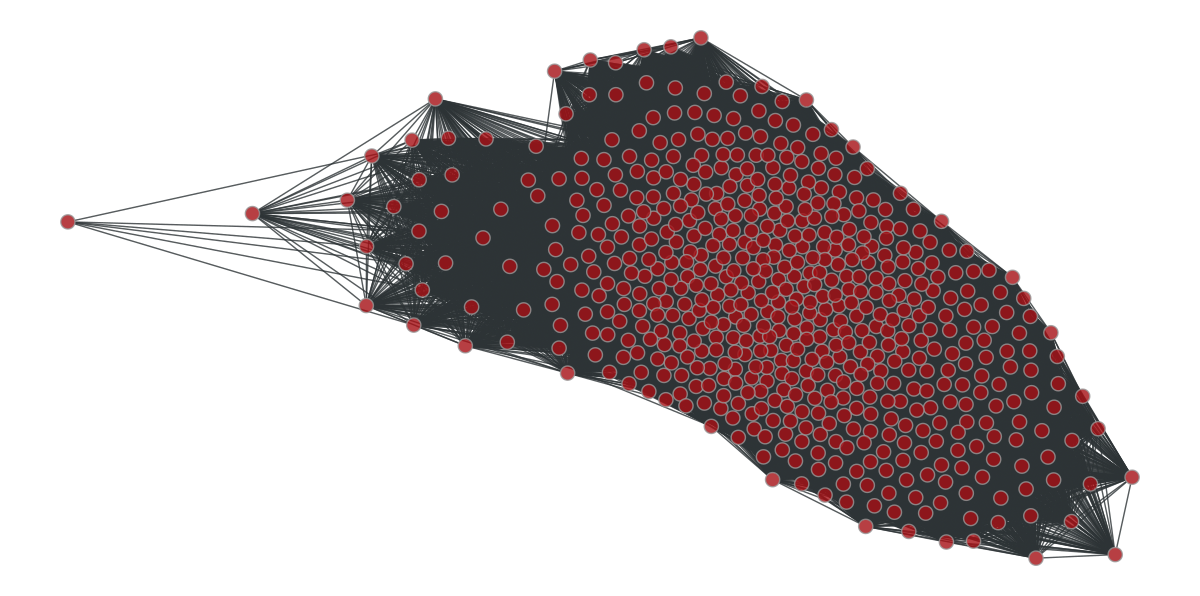

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5d6f75caf0, at 0x7f5d6f892b30>

In [75]:
gt.graph_draw(g)

In [76]:
state = gt.minimize_nested_blockmodel_dl(g)

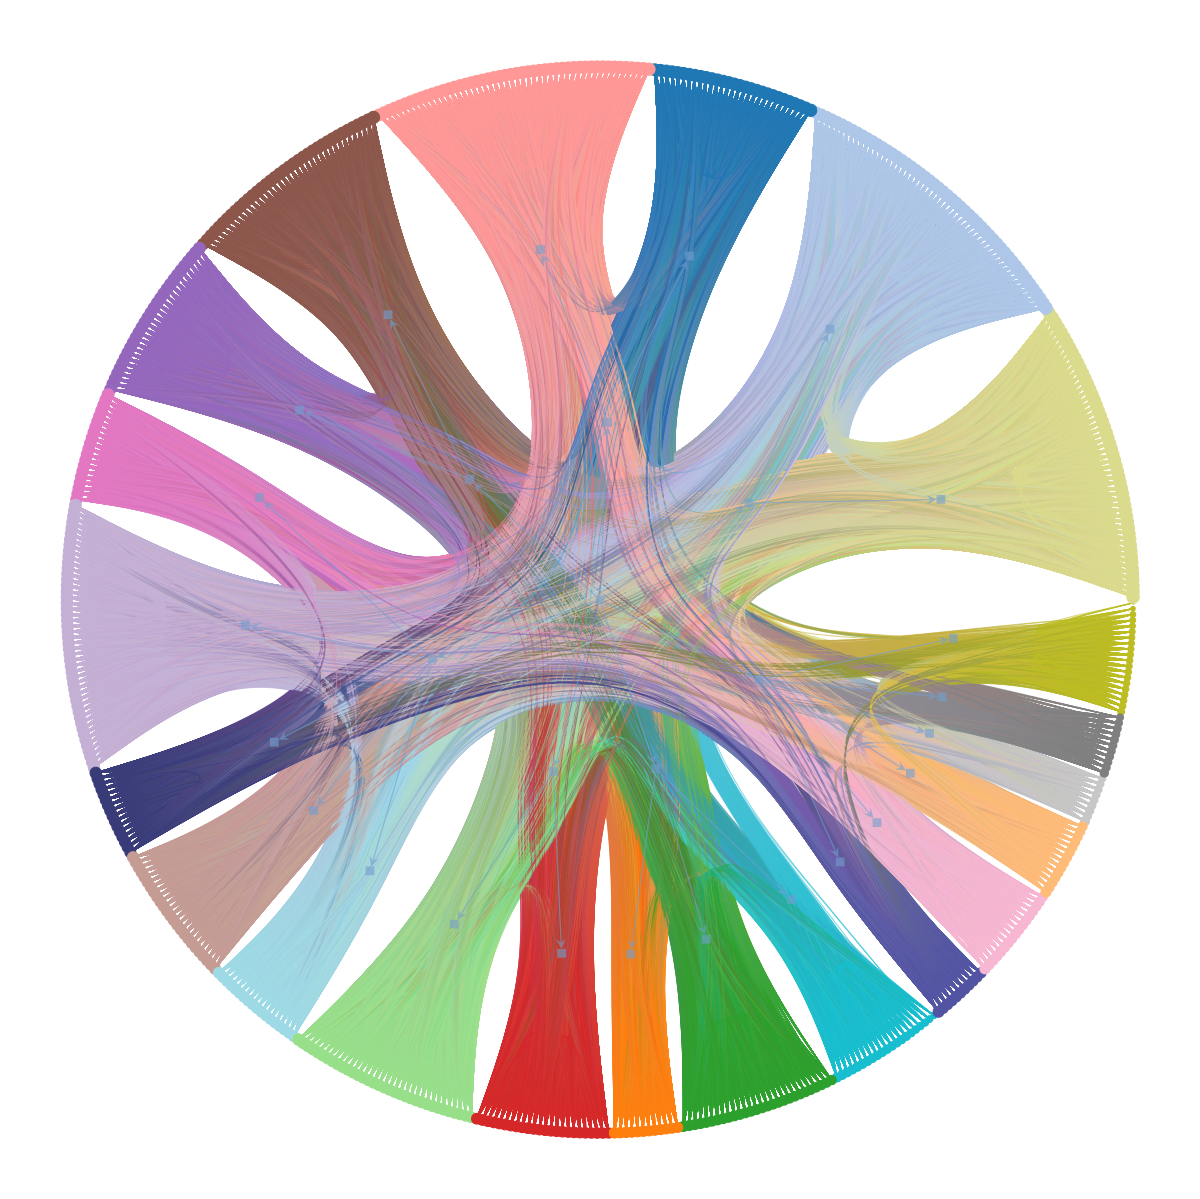

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5d6f75caf0, at 0x7f5d6f8cf400>,
 <GraphView object, directed, with 610 vertices and 609 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f5d6f8ccfd0, at 0x7f5d6f8cd690>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f5d6f8ccfd0, at 0x7f5d6f8ce650>, False), at 0x7f5d6f8ccfd0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5d6f8ccfd0, at 0x7f5d6f8b0820>)

In [77]:
state.draw()

In [42]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle

In [69]:
circular  = circular_layout(covotes, uniform=False)
randomloc = random_layout(covotes)
randomloc.tail()

acteurRef,PA1008,PA1206,PA1327,PA1567,PA1592,PA1630,PA1874,PA2449,PA266788,PA266793,...,PA796110,PA796118,PA796132,PA805166,PA817203,PA817211,PA822617,PA942,x,y
PA805166,735,928,980,812,1055,1046,906,899,975,900,...,811,608,729,1504,1130,902,978,825,0.384526,0.380033
PA817203,940,1152,1177,962,1286,1279,1101,1038,1216,1049,...,983,775,939,1130,1504,1099,1213,1036,0.266246,0.850562
PA817211,1045,1145,1034,1077,1176,1149,1076,849,1165,940,...,963,759,1033,902,1099,1504,1192,939,0.650778,0.016588
PA822617,1029,1368,1184,1094,1361,1314,1300,941,1416,1081,...,1174,846,1071,978,1213,1192,1504,1096,0.905354,0.694629
PA942,942,1066,1107,928,1169,1128,1072,1006,1109,1049,...,1005,875,909,825,1036,939,1096,1504,0.975191,0.206570


In [71]:
cvsopts = dict(plot_height=400, plot_width=400)

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3, name=name)

tf.Images(nodesplot(randomloc,"Random layout"),
          nodesplot(circular, "Circular layout"))

AttributeError: module 'numpy' has no attribute 'warnings'